## Simple data reading, manipulation and plotting of the `penguins` dataset

#### Activates the environment specified in Project.toml in the directory root

In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `~/Coding/machine-learning-julia`


In [25]:
using CSV
using DataFrames
using HTTP
using StatsPlots
Pkg.status()

Status `~/Coding/machine-learning-julia/Project.toml`
  [336ed68f] CSV v0.10.4
  [a93c6f00] DataFrames v1.3.5
  [cd3eb016] HTTP v1.3.3
  [7073ff75] IJulia v1.23.3
  [91a5bcdd] Plots v1.33.0
  [f3b207a7] StatsPlots v0.15.3


In [20]:
ENV["COLUMNS"]=120

120

In [11]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = DataFrame(CSV.File(HTTP.get(url).body));

In [22]:
first(df, 3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
,String15,String15,Float64?,Float64?,Int64?,Int64?,String7?
1,Adelie,Torgersen,39.1,18.7,181,3750,MALE
2,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
3,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE


In [21]:
describe(df, :all)

,variable,mean,std,min,q25,median,q75,max,nunique,nmissing,first,last,eltype
,Symbol,Union…,Union…,Any,Union…,Union…,Union…,Any,Union…,Int64,Any,Any,Type
1,species,,,Adelie,,,,Gentoo,3,0,Adelie,Gentoo,String15
2,island,,,Biscoe,,,,Torgersen,3,0,Torgersen,Biscoe,String15
3,bill_length_mm,43.9219,5.45958,32.1,39.225,44.45,48.5,59.6,,2,39.1,49.9,"Union{Missing, Float64}"
4,bill_depth_mm,17.1512,1.97479,13.1,15.6,17.3,18.7,21.5,,2,18.7,16.1,"Union{Missing, Float64}"
5,flipper_length_mm,200.915,14.0617,172,190.0,197.0,213.0,231,,2,181,213,"Union{Missing, Int64}"
6,body_mass_g,4201.75,801.955,2700,3550.0,4050.0,4750.0,6300,,2,3750,5400,"Union{Missing, Int64}"
7,sex,,,FEMALE,,,,MALE,2,11,MALE,MALE,"Union{Missing, String7}"


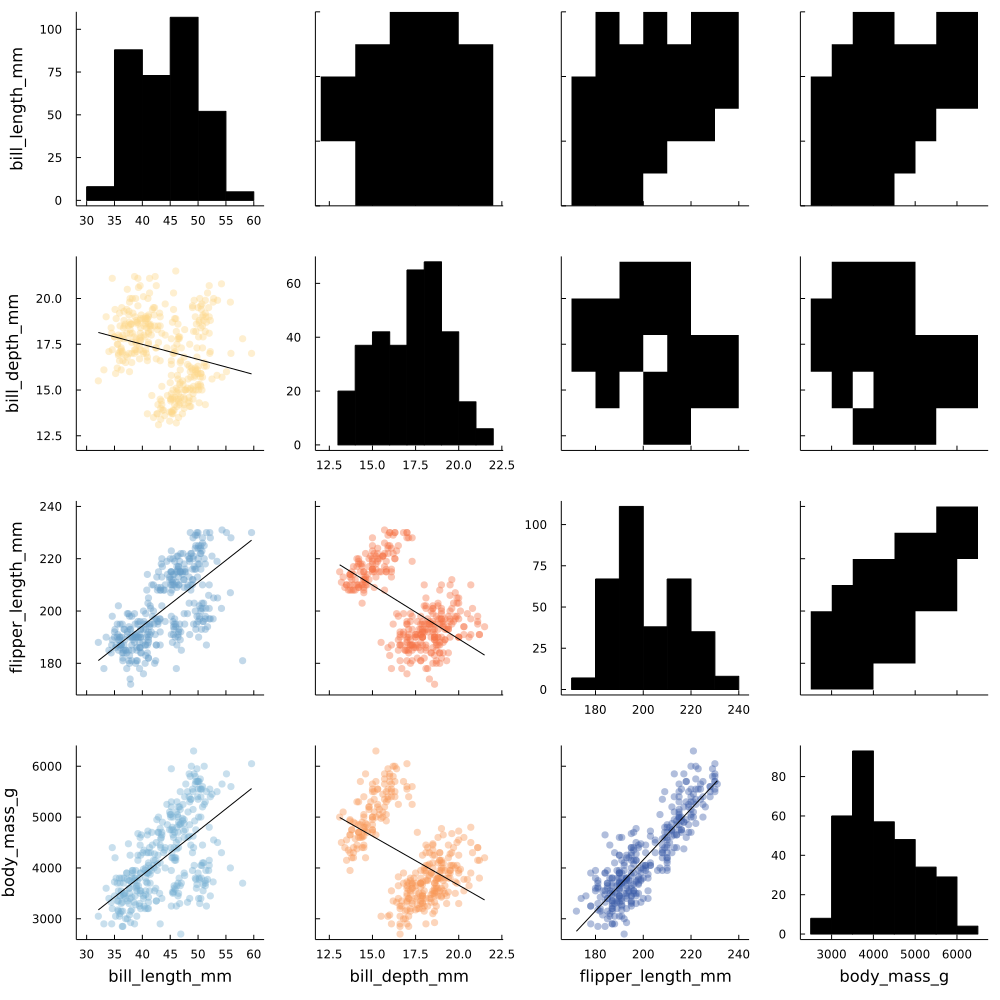

In [30]:
gr(size = (1000, 1000))
@df dropmissing(df) corrplot(cols(3:6), grid = false)

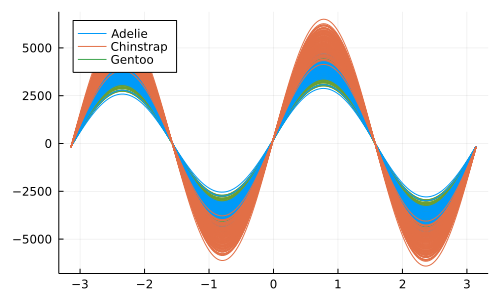

In [33]:
gr(size = (500, 300))
@df dropmissing(df) andrewsplot(:species, cols(3:6), legend = :topleft)

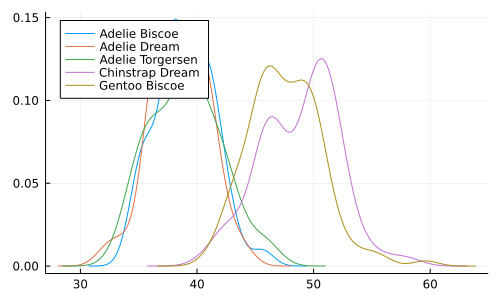

In [35]:
gr(size = (500, 300))
@df dropmissing(df) density(:bill_length_mm, group = (:species, :island), legend = :topleft)